In [1]:
import pandas as pd
import numpy as np
import datetime
#update_time: the date seperate traing set and testing set
update_time='2020-4-05'

df=pd.read_csv('covid_19_clean_complete.csv')
df['Date']=df.Date.apply(lambda x:x+'20')
df['Date']=pd.to_datetime(df['Date'], format="%m/%d/%Y")

df=df[df['Date']> pd.to_datetime('2020-02-28')]#comma this to see the result by using data from Jan 22nd

update=df[df['Date']> pd.to_datetime(update_time)]

#model are trained start from '2020-03-01'
USA=df[df['Country/Region']=='US'].reset_index()
Spain=df[df['Country/Region']=='Spain'].reset_index()
Germany=df[df['Country/Region']=='Germany'].reset_index()
Italy=df[df['Country/Region']=='Italy'].reset_index()
Canada=df[df['Country/Region']=='Canada'].groupby('Date').sum().reset_index()
Canada_detail=df[df['Country/Region']=='Canada'].groupby(['Province/State','Date']).sum().reset_index()
Canada_detail

,Province/State,Date,Lat,Long,Confirmed,Deaths,Recovered
0,Alberta,2020-02-29,53.9333,-116.5765,0,0,0
1,Alberta,2020-03-01,53.9333,-116.5765,0,0,0
2,Alberta,2020-03-02,53.9333,-116.5765,0,0,0
3,Alberta,2020-03-03,53.9333,-116.5765,0,0,0
4,Alberta,2020-03-04,53.9333,-116.5765,0,0,0
...,...,...,...,...,...,...,...
611,Yukon,2020-04-08,64.2823,-135.0000,7,0,0
612,Yukon,2020-04-09,64.2823,-135.0000,7,0,0
613,Yukon,2020-04-10,64.2823,-135.0000,8,0,0
614,Yukon,2020-04-11,64.2823,-135.0000,8,0,0


In [2]:
#update data are start from 2020/3/29
USA_new=update[update['Country/Region']=='US']
Spain_new=update[update['Country/Region']=='Spain']
Italy_new=update[update['Country/Region']=='Italy']
Germany_new=update[update['Country/Region']=='Germany']
Canada_new=update[update['Country/Region']=='Canada'].groupby('Date').sum().reset_index()
Canada_new['Country/Region']='Canada'

In [3]:
#Prophet model
from fbprophet import Prophet
import matplotlib as plt
from fbprophet.plot import plot_plotly, add_changepoints_to_plot
import plotly.offline as py
from sklearn.metrics import mean_squared_error
from fbprophet.diagnostics import cross_validation
def prophet_predict(country,column):
    df=country[['Date',column]].rename(columns={"Date":'ds',column:"y"}).reset_index()
    m=Prophet()
    m.fit(df)
    future = m.make_future_dataframe(periods=7)
    forecast =m.predict(future)   
    cnfrm = forecast.loc[:,['ds','trend']]
    cnfrm.columns = ['Date',column]
    df_cv = cross_validation(m, initial='30 days', period='30 days', horizon = '7 days')
    df_cv.head()
    return cnfrm,df_cv

In [4]:
#predict for five country
fore1,cross_us=prophet_predict(USA,'Confirmed')
fore2,cross_ca=prophet_predict(Canada,'Confirmed')
fore3,cross_itlay=prophet_predict(Italy,"Confirmed")
fore4,cross_spain=prophet_predict(Spain,'Confirmed')
fore5,cross_german=prophet_predict(Germany,'Confirmed')
fore2=fore2.drop(['Date'],axis=1)
fore3=fore3.drop(['Date'],axis=1)
fore4=fore4.drop(['Date'],axis=1)
fore5=fore5.drop(['Date'],axis=1)
fore1.columns=['Date','US']
fore2.columns=['Canada']
fore3.columns=['Italy']
fore4.columns=['Spain']
fore5.columns=['Germany']

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 1 forecasts with cutoffs between 2020-04-05 00:00:00 and 2020-04-05 00:00:00
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 1 forecasts with cutoffs between 2020-04-05 00:00:00 and 2020-04-05 00:00:00
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 1 forecasts with cutoffs between 2020-04-05 00:00:00 and 2020-04-05 00:00:00
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True

In [5]:
cross_ca

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2020-04-06,9235.054293,6343.971872,12008.109737,16563,2020-04-05
1,2020-04-07,9615.576554,6553.777334,12768.969290,17872,2020-04-05
2,2020-04-08,9957.275186,6924.863322,13048.360383,19141,2020-04-05
3,2020-04-09,10492.090368,7574.052225,13216.837260,20654,2020-04-05
4,2020-04-10,10897.490192,8267.690598,13792.365093,22059,2020-04-05
5,2020-04-11,11791.247461,8914.839965,14697.611768,23316,2020-04-05
6,2020-04-12,12415.528856,9628.963288,15510.411461,24298,2020-04-05


In [6]:
cross_us

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2020-04-06,202312.552771,133478.534605,270107.161954,366667,2020-04-05
1,2020-04-07,210003.718567,143152.855952,275618.746789,396223,2020-04-05
2,2020-04-08,217799.430513,141902.074098,283362.786748,429052,2020-04-05
3,2020-04-09,228777.062038,157725.619026,296578.983042,461437,2020-04-05
4,2020-04-10,239928.649740,178041.020230,305069.470600,496535,2020-04-05
5,2020-04-11,263335.754302,193526.517170,327704.000020,526396,2020-04-05
6,2020-04-12,272714.820073,206407.193278,336909.671566,555313,2020-04-05


In [7]:
df_confirm=pd.concat([fore1,fore2,fore3,fore4,fore5],axis=1)
df_confirm=df_confirm.set_index(['Date'])
# fill the minus prediction in prophet with 0, since the trend of the model cannot < 0
def zerofill(i):
    if i<0:
        i=0
    return i
for name in df_confirm.columns:
    df_confirm[name]=df_confirm[name].apply(lambda x: zerofill(x))

df_confirm=df_confirm
df_real=pd.concat([USA['Date'],USA['Confirmed'],Canada['Confirmed'],Spain['Confirmed'],Germany['Confirmed'],Italy['Confirmed']],axis=1,ignore_index=True)
df_real.columns=['Date','USA_real','Canada_real','Spain_real','Germany_real','Italy_real']
df_real=df_real.set_index('Date')

In [8]:
#the predicition made by prophet
df_confirm

,US,Canada,Italy,Spain,Germany
Date,,,,,
2020-02-29,0.000000,0.000000,518.989524,58.587265,0.000000
2020-03-01,0.000000,0.123100,1238.003223,100.934706,0.000000
2020-03-02,0.000000,11.135029,1957.016914,143.282149,124.718638
2020-03-03,0.000000,22.146958,2676.030606,185.629593,254.499870
2020-03-04,0.000000,33.158886,3395.044262,227.977031,384.281103
2020-03-05,0.000000,44.170816,4114.057731,270.491368,514.062335
2020-03-06,0.000000,55.183011,4833.040946,369.555809,644.214481
2020-03-07,0.000000,66.195206,5552.024162,468.620251,774.366626
2020-03-08,0.000000,77.266806,7106.100635,880.889041,1076.243403


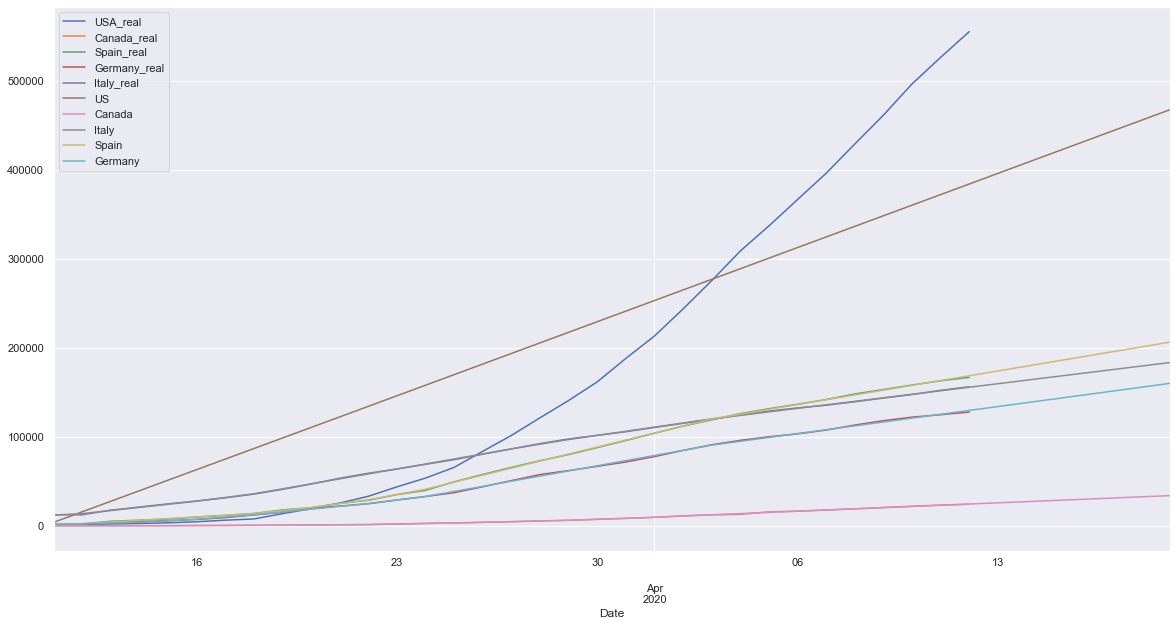

In [9]:

import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
df_final=pd.concat([df_real,df_confirm],axis=1)
#plot of the prediction confirmed cases of five country and the real data
df_final.tail(40).plot(figsize=(20,10))

In [10]:
#the real confirmed cases and the prediction by the model
df_final

,USA_real,Canada_real,Spain_real,Germany_real,Italy_real,US,Canada,Italy,Spain,Germany
Date,,,,,,,,,,
2020-02-29,68.0,20.0,45.0,79.0,1128.0,0.000000,0.000000,518.989524,58.587265,0.000000
2020-03-01,74.0,24.0,84.0,130.0,1694.0,0.000000,0.123100,1238.003223,100.934706,0.000000
2020-03-02,98.0,27.0,120.0,159.0,2036.0,0.000000,11.135029,1957.016914,143.282149,124.718638
2020-03-03,118.0,30.0,165.0,196.0,2502.0,0.000000,22.146958,2676.030606,185.629593,254.499870
2020-03-04,149.0,33.0,222.0,262.0,3089.0,0.000000,33.158886,3395.044262,227.977031,384.281103
2020-03-05,217.0,37.0,259.0,482.0,3858.0,0.000000,44.170816,4114.057731,270.491368,514.062335
2020-03-06,262.0,49.0,400.0,670.0,4636.0,0.000000,55.183011,4833.040946,369.555809,644.214481
2020-03-07,402.0,54.0,500.0,799.0,5883.0,0.000000,66.195206,5552.024162,468.620251,774.366626
2020-03-08,518.0,64.0,673.0,1040.0,7375.0,0.000000,77.266806,7106.100635,880.889041,1076.243403


Text(0.5, 1.0, 'prediction of confirmed case in last 30')

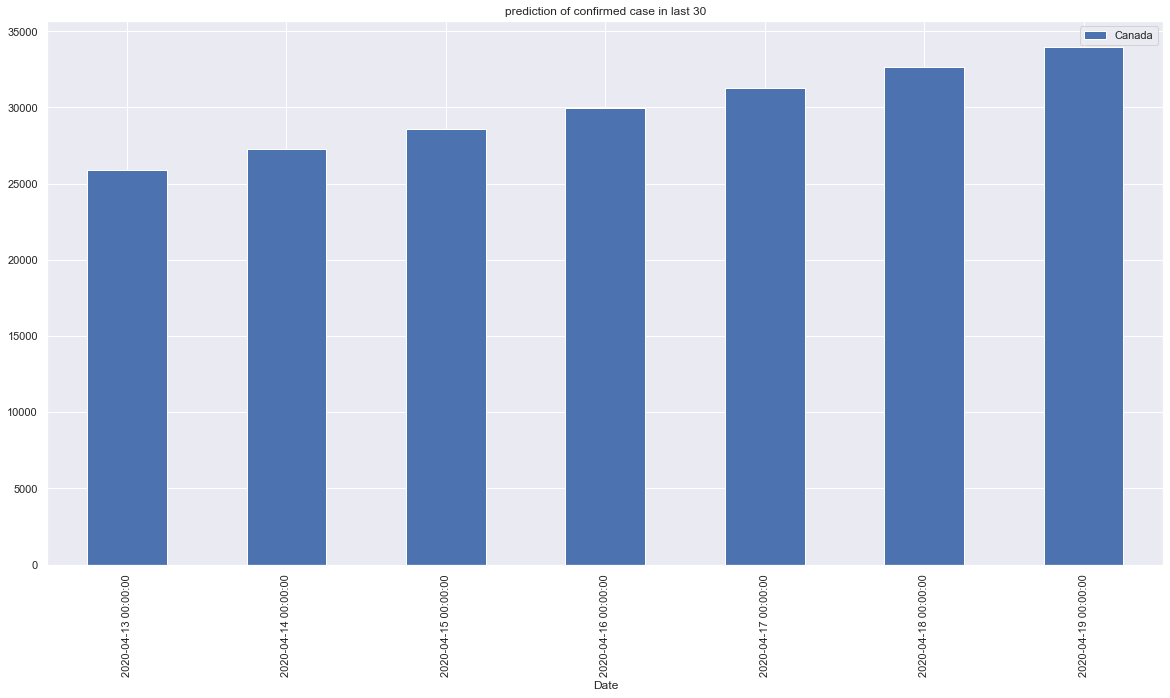

In [11]:
month_pred=df_confirm.tail(7)
month_pred[['Canada']].plot.bar(figsize=(20,10))
plt.title('prediction of confirmed case in last 30')
#prediction of confirmed cases for recent 30 days in Canada


In [12]:
from sklearn.metrics import mean_squared_error
df_final=df_final.dropna()
ca_mse=mean_squared_error(df_final['Canada_real'],df_final['Canada'])
us_mse=mean_squared_error(df_final['USA_real'],df_final['US'])
itl_mse=mean_squared_error(df_final['Italy_real'],df_final['Italy'])
spn_mse=mean_squared_error(df_final['Spain_real'],df_final['Spain'])
gem_mse=mean_squared_error(df_final['Germany_real'],df_final['Germany'])

print("Canada MSE = ", ca_mse)
print("US MSE = ", us_mse)
print('Italy MSE = ',itl_mse)
print('Spain MSE = ',spn_mse)
print('Germany MSE=',gem_mse)


Canada MSE =  29853.367055577153
US MSE =  5214521318.133167
Italy MSE =  241674.42355716697
Spain MSE =  318319.474114901
Germany MSE= 518466.6377628273


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/site-packages/matplotlib/pyplot.py'>

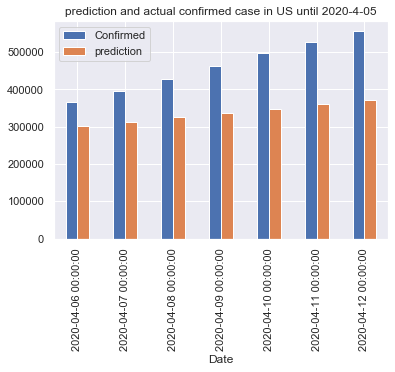

In [13]:
#USA
def compare_pred_truth(USA_new,df_confirm):
    country=USA_new['Country/Region'].values[0]
    USA_new=USA_new[['Date','Confirmed']].reset_index()
    USA_new_1=df_confirm.loc[update_time:'2020-04-11'].round().reset_index()
    USA_new_1
    USA_new['prediction']=USA_new_1[country]
    USA_new=USA_new.drop(columns=['index'])
    USA_new.set_index(['Date']).plot.bar()
    plt.title("prediction and actual confirmed case in "+country+" until "+update_time)
    
    return plt
#USA_new.columns
compare_pred_truth(USA_new,df_confirm)


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/site-packages/matplotlib/pyplot.py'>

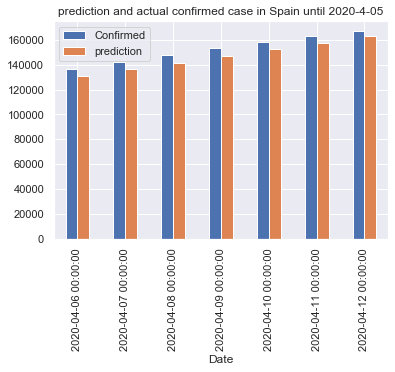

In [14]:
compare_pred_truth(Spain_new,df_confirm)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/site-packages/matplotlib/pyplot.py'>

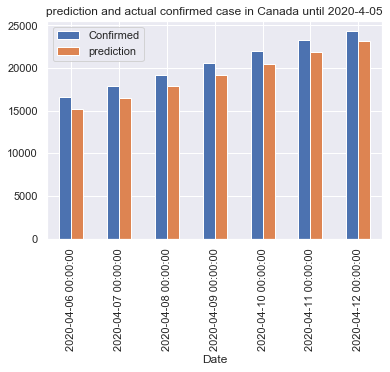

In [15]:
compare_pred_truth(Canada_new,df_confirm)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/site-packages/matplotlib/pyplot.py'>

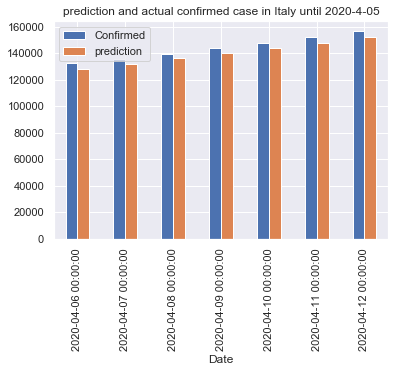

In [16]:
compare_pred_truth(Italy_new,df_confirm)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/site-packages/matplotlib/pyplot.py'>

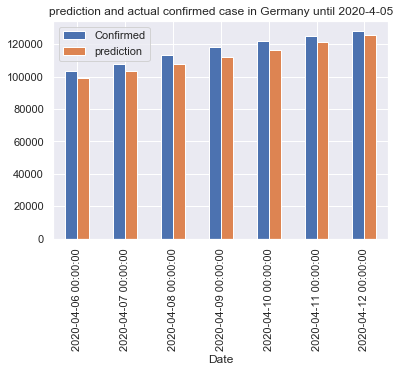

In [17]:
compare_pred_truth(Germany_new,df_confirm)

In [18]:
#prediction for province in Canada

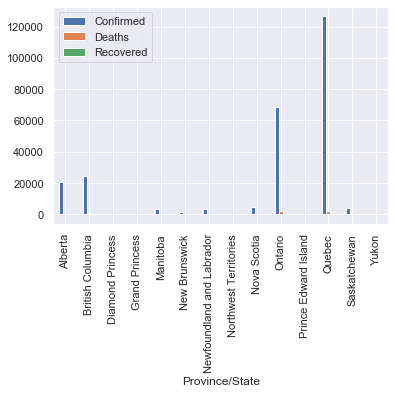

In [19]:
rank=Canada_detail.groupby(['Province/State']).sum().drop(columns=['Lat','Long'])
rank.plot.bar()
#rank.sort(['Confirmed']).head(5)

In [20]:
AB=Canada_detail[Canada_detail['Province/State']=='Alberta'].reset_index()
BC=Canada_detail[Canada_detail['Province/State']=='British Columbia'].reset_index()
ON=Canada_detail[Canada_detail['Province/State']=='Ontario'].reset_index()
QB=Canada_detail[Canada_detail['Province/State']=='Saskatchewan'].reset_index()
MN=Canada_detail[Canada_detail['Province/State']=='Manitoba'].reset_index()
NB=Canada_detail[Canada_detail['Province/State']=='New Brunswick'].reset_index()
NS=Canada_detail[Canada_detail['Province/State']=='Nova Scotia'].reset_index()

In [21]:
AB_pre,cross_AB=prophet_predict(AB,'Confirmed')
BC_pre,cross_BC=prophet_predict(BC,'Confirmed')
ON_pre,cross_ON=prophet_predict(ON,'Confirmed')
QB_pre,cross_QB=prophet_predict(QB,'Confirmed')
NS_pre,cross_NS=prophet_predict(NS,'Confirmed')

                 

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 1 forecasts with cutoffs between 2020-04-05 00:00:00 and 2020-04-05 00:00:00
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 1 forecasts with cutoffs between 2020-04-05 00:00:00 and 2020-04-05 00:00:00
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 1 forecasts with cutoffs between 2020-04-05 00:00:00 and 2020-04-05 00:00:00
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True

In [22]:
fore1=AB_pre.set_index('Date')
fore2=BC_pre.set_index('Date')
fore3=ON_pre.set_index('Date')
fore4=QB_pre.set_index('Date')
fore5=NS_pre.set_index('Date')
AB_pre.columns=['Date','AB']
fore1.columns=['AB']
fore2.columns=['BC']
fore3.columns=['ON']
fore4.columns=['QB']
fore5.columns=['NS']

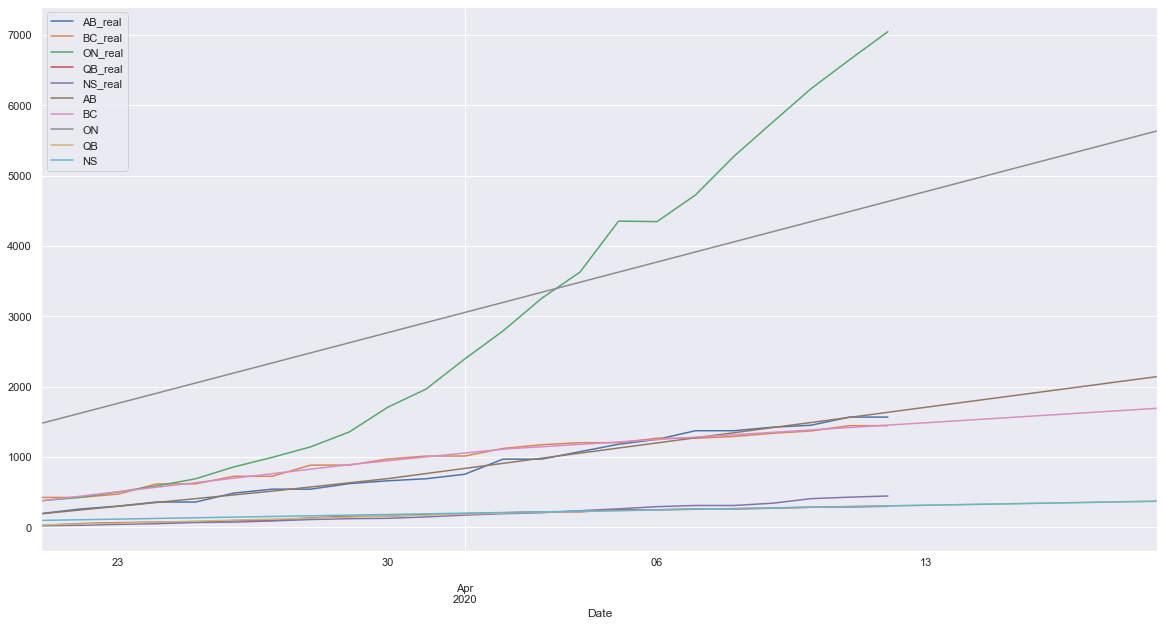

In [23]:
canada_predict=pd.concat([fore1,fore2,fore3,fore4,fore5],axis=1)
canada_confirm=canada_predict
def zerofill(i):
    if i<0:
        i=0
    return i
for name in canada_confirm.columns:
    canada_confirm[name]=canada_confirm[name].apply(lambda x: zerofill(x))
df_real=pd.concat([AB['Date'],AB['Confirmed'],BC['Confirmed'],ON['Confirmed'],QB['Confirmed'],NS['Confirmed']],axis=1,ignore_index=True)
df_real.columns=['Date','AB_real','BC_real','ON_real','QB_real','NS_real']
df_real=df_real.set_index('Date')
df_final=pd.concat([df_real,canada_confirm],axis=1)
df_final.tail(30).plot(figsize=(20,10))

In [24]:
df_final.tail(15)

,AB_real,BC_real,ON_real,QB_real,NS_real,AB,BC,ON,QB,NS
Date,,,,,,,,,,
2020-04-05,1181.0,1203.0,4354.0,249.0,262.0,1126.979844,1213.252484,3628.460780,235.364396,238.208832
2020-04-06,1250.0,1266.0,4347.0,249.0,293.0,1199.557071,1247.450143,3771.983476,245.165767,247.597982
2020-04-07,1373.0,1266.0,4726.0,260.0,310.0,1272.134297,1281.647801,3915.506172,254.967139,256.987132
2020-04-08,1373.0,1291.0,5276.0,260.0,310.0,1344.711523,1315.845459,4059.028868,264.768510,266.376282
2020-04-09,1423.0,1336.0,5759.0,271.0,342.0,1417.288750,1350.043118,4202.551564,274.569881,275.765433
2020-04-10,1451.0,1370.0,6237.0,285.0,407.0,1489.865976,1384.240776,4346.074260,284.371253,285.154583
2020-04-11,1567.0,1445.0,6648.0,289.0,428.0,1562.443202,1418.438435,4489.596956,294.172624,294.543733
2020-04-12,1567.0,1445.0,7049.0,298.0,445.0,1635.020429,1452.636093,4633.119651,303.973995,303.932883
2020-04-13,NaN,NaN,NaN,NaN,NaN,1707.597655,1486.833752,4776.642347,313.775366,313.322033
